In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import both Dataset     (https://dx.doi.org/10.17632/n76t439f65.1)

In [260]:
df1 =pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Max_solar_data.csv')
df2=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Lim_solar_data.csv')
  
df = pd.concat([df1,df2], ignore_index=True, axis=0)
df = df.iloc[:,1:] # Take the time column out
df

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,2.369843,90.429688,147.949219,0.616820,-0.530396,-0.160283,-146.003418,120.255127,25.595601,1.000000,50.000000,1.000000,50.000000,F0M
1,2.378357,90.368652,148.242188,-0.678956,0.570679,0.047847,148.546906,-119.881439,-24.723663,1.000000,50.000000,1.000000,50.000000,F0M
2,2.373627,90.460205,148.535156,0.603393,-0.537109,-0.187139,-145.027008,120.315399,26.109924,1.000000,50.000000,1.000000,50.000000,F0M
3,2.368896,90.423584,148.242188,-0.685670,0.570679,0.041133,147.341461,-119.736786,-26.105906,0.440380,50.078491,118.275197,49.921509,F0M
4,2.362274,90.435791,148.242188,0.630248,-0.523682,-0.166997,-143.279114,120.942230,26.680501,0.618996,50.248673,90.022162,49.606494,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,1.531647,102.056885,142.675781,0.354979,-0.503540,0.148555,-108.381500,152.585144,-40.760091,0.519110,50.036816,155.672324,49.999645,F7L
21632,1.565704,101.104736,143.261719,-0.403687,0.523682,-0.126714,110.756226,-149.559479,43.311615,0.519713,50.087054,155.706972,49.992937,F7L
21633,1.501373,101.556396,142.968750,0.361693,-0.530396,0.182124,-108.803406,152.319946,-40.470785,0.522856,50.138598,155.636851,49.996147,F7L
21634,1.492859,100.970459,143.847656,-0.396974,0.537109,-0.106572,110.720062,-150.451508,42.560221,0.525012,49.932554,155.571019,50.008771,F7L


# Scale The Data

In [261]:
scaler=StandardScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])

In [262]:
df

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.979735,0.100169,0.313577,1.391768,-0.857034,-0.220780,-1.196860,1.032965,0.279438,0.780398,0.095092,-24.688949,0.016969,F0M
1,0.993837,0.097543,0.324291,-1.424348,0.909961,0.112665,1.204111,-1.043958,-0.288110,0.780398,0.095092,-24.688949,0.016969,F0M
2,0.986003,0.101482,0.335005,1.362585,-0.867809,-0.263805,-1.188901,1.033486,0.285239,0.780398,0.095092,-24.688949,0.016969,F0M
3,0.978168,0.099906,0.324291,-1.438939,0.909961,0.101908,1.194285,-1.042707,-0.303700,-0.223435,0.116185,-5.896742,-3.778340,F0M
4,0.967200,0.100432,0.324291,1.420950,-0.846260,-0.231536,-1.174653,1.038908,0.291675,0.096962,0.161919,-10.424015,-19.010500,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,-0.408546,0.600375,0.120725,0.822708,-0.813937,0.274009,-0.890192,1.312585,-0.468984,-0.082210,0.104985,0.095783,-0.000179,F7L
21632,-0.352137,0.559413,0.142153,-0.826106,0.834540,-0.166999,0.896067,-1.300641,0.479256,-0.081129,0.118486,0.101335,-0.324573,F7L
21633,-0.458687,0.578843,0.131439,0.837299,-0.857034,0.327790,-0.893631,1.310291,-0.465721,-0.075491,0.132338,0.090099,-0.169323,F7L
21634,-0.472789,0.553636,0.163581,-0.811514,0.856089,-0.134730,0.895773,-1.308356,0.470781,-0.071624,0.076966,0.079550,0.441069,F7L


# Using sliding window to create Input and Output

In [263]:
win_len  = 10
stride = 1


In [264]:
df_temp=df[df['label']=='F0M']

In [265]:
df_temp

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.979735,0.100169,0.313577,1.391768,-0.857034,-0.220780,-1.196860,1.032965,0.279438,0.780398,0.095092,-24.688949,0.016969,F0M
1,0.993837,0.097543,0.324291,-1.424348,0.909961,0.112665,1.204111,-1.043958,-0.288110,0.780398,0.095092,-24.688949,0.016969,F0M
2,0.986003,0.101482,0.335005,1.362585,-0.867809,-0.263805,-1.188901,1.033486,0.285239,0.780398,0.095092,-24.688949,0.016969,F0M
3,0.978168,0.099906,0.324291,-1.438939,0.909961,0.101908,1.194285,-1.042707,-0.303700,-0.223435,0.116185,-5.896742,-3.778340,F0M
4,0.967200,0.100432,0.324291,1.420950,-0.846260,-0.231536,-1.174653,1.038908,0.291675,0.096962,0.161919,-10.424015,-19.010500,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,0.644417,0.127214,0.270721,1.158307,-1.126393,0.241740,-0.889799,1.319674,-0.466355,0.291560,0.093851,0.085752,0.313944,F0M
1407,0.664786,0.130103,0.270721,-1.103340,1.211643,-0.392881,0.907269,-1.291571,0.503820,0.294454,0.077690,0.089229,-0.044963,F0M
1408,0.738431,0.097806,0.302863,1.114534,-1.147942,0.241740,-0.877516,1.320300,-0.467760,0.289405,0.105481,0.122722,0.167357,F0M
1409,0.910791,0.094392,0.270721,-1.088749,1.211643,-0.414393,0.902454,-1.290424,0.505044,0.289383,0.096021,0.115834,-0.388128,F0M


In [266]:
X=[]
Y=[]


i=0
X.append(df_temp.iloc[i:i+win_len,:-1])
Y.append(df_temp.iloc[i+win_len,-1])

X,Y

([        Ipv       Vpv       Vdc        ia        ib        ic        va  \
  0  0.979735  0.100169  0.313577  1.391768 -0.857034 -0.220780 -1.196860   
  1  0.993837  0.097543  0.324291 -1.424348  0.909961  0.112665  1.204111   
  2  0.986003  0.101482  0.335005  1.362585 -0.867809 -0.263805 -1.188901   
  3  0.978168  0.099906  0.324291 -1.438939  0.909961  0.101908  1.194285   
  4  0.967200  0.100432  0.324291  1.420950 -0.846260 -0.231536 -1.174653   
  5  1.003239  0.103583  0.324291 -1.438939  0.909961  0.101908  1.202146   
  6  0.971900  0.139293  0.324291  1.420950 -0.846260 -0.220780 -1.174948   
  7  0.960932  0.084415  0.324291 -1.453530  0.909961  0.091152  1.201851   
  8  0.993837  0.074699  0.335005  1.406359 -0.857034 -0.220780 -1.176716   
  9  0.976601  0.075750  0.324291 -1.468122  0.931510  0.091152  1.202047   
  
           vb        vc      Iabc        If       Vabc         Vf  
  0  1.032965  0.279438  0.780398  0.095092 -24.688949   0.016969  
  1 -1.043958 

In [269]:
np.arange(0,len(df_temp)-(win_len),1)

array([   0,    1,    2, ..., 1398, 1399, 1400])

In [270]:
win_len=100

X=[]
Y=[]

for i in np.arange(0,len(df_temp)-(win_len),stride):
            X.append(df_temp.iloc[i:i+win_len,:-1])
            Y.append(df_temp.iloc[i+win_len,-1])
    

In [271]:
X=np.array(X)
X.shape

(1311, 100, 13)

In [272]:
df['label'].unique()

array(['F0M', 'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M', 'F0L',
       'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L'], dtype=object)

In [273]:
X=[]
Y=[]

no_classes = len(df['label'].unique())

for k in ['M','L']:
    
    for j in range(0,8):
        df_temp=df[df['label']=='F{}{}'.format(j,k)]

        for i in np.arange(0,len(df_temp)-(win_len),stride):
            X.append(df_temp.iloc[i:i+win_len,:-1])
            Y.append(df_temp.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)





In [276]:
Y[0]

'F0M'

In [278]:
encoded_Y[0]

1

In [279]:
OHE_Y[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Train Test Split

In [255]:
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [280]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [281]:
X_test.shape

(4008, 100, 13, 1)

# CNN Model

In [196]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(20, 3),activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((20, 2),strides=(5, 5),padding='same'))

cnn_model.add(Conv2D(64, (10, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(10, 2),strides=(3, 3),padding='same'))

# cnn_model.add(Conv2D(128, (5, 3), activation='relu',padding='same'))
                 
# cnn_model.add(MaxPooling2D(pool_size=(5, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
         

cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 100, 13, 32)       1952      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 20, 3, 32)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 20, 3, 64)         61504     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 1, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 448)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               57472     
_________________________________________________________________
dense_33 (Dense)             (None, 16)              

# Training the CNN

In [282]:
batch_size = 400
epochs = 10
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=2,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/10
41/41 - 17s - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 2/10
41/41 - 15s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/10
41/41 - 11s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/10
41/41 - 11s - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/10
41/41 - 11s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
41/41 - 11s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/10
41/41 - 11s - loss: 9.3357e-04 - accuracy: 1.0000 - val_loss: 7.4942e-04 - val_accuracy: 1.0000
Epoch 8/10
41/41 - 11s - loss: 7.7034e-04 - accuracy: 1.0000 - val_loss: 6.5037e-04 - val_accuracy: 1.0000
Epoch 9/10
41/41 - 11s - loss: 6.8713e-04 - accuracy: 1.0000 - val_loss: 6.3621e-04 - val_accuracy: 1.0000
Epoch 10/10
41/41 - 11s - loss: 6.0547e-04 - accuracy: 1.0000 - val_loss: 5.7460e-04 

In [199]:
cnn_model.save(r'H:\Solar_panel_IFD\Trained_model\CNN_model_solar.h5')

In [283]:
from tensorflow.keras.models import load_model
cnn_model = load_model(r'H:\Solar_panel_IFD\Trained_model\CNN_model_solar.h5')

# Evaluating Performance of the CNN

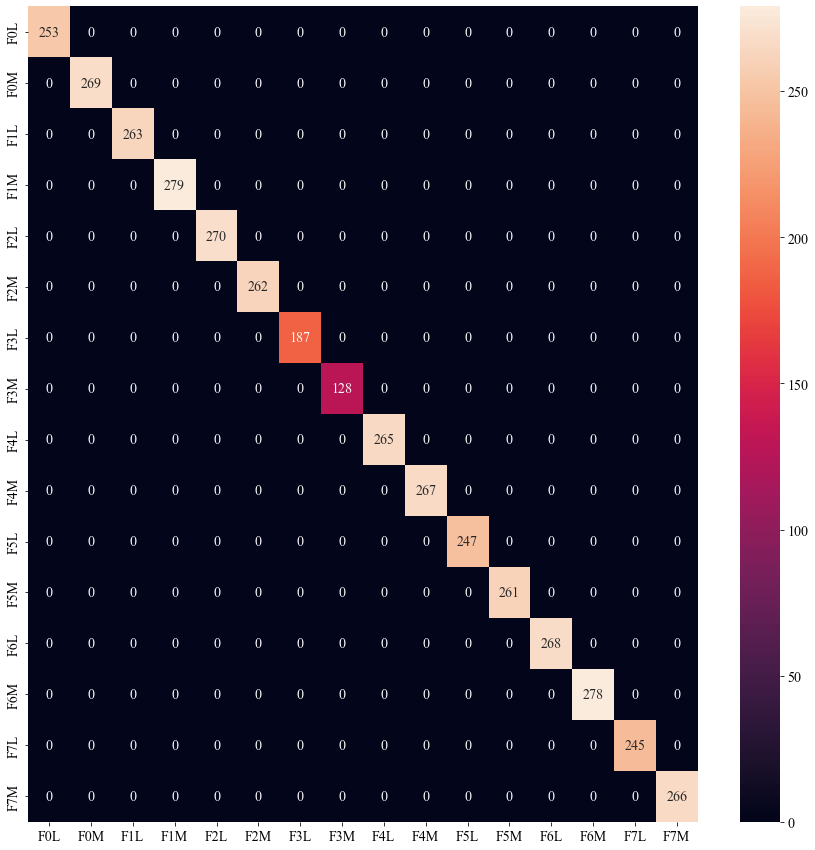

In [218]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(15,15))
cm = confusion_matrix(Y_test, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()